In [23]:

# importo las librerias
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.impute import SimpleImputer


In [2]:

# levanto el dataset que esta en git y lo guardo en una variable llamada url
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'

# leo el csv, paso los parametros, url, separados por coma, y que no tome ningun header
df= pd.read_csv(url,sep=',', header=None)
# uso la funcion head para leer los 5 primeros campos.
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# renombramos las columnas
# usando el parametro rename, pongo que a las columnas, y primero paso indice: el nombre nuevo.
df= df.rename(columns={0: "NEMB",
                       1: "GLU",
                       2: "PART",
                       3:"GROS",
                       4:"HUR",
                       5:"BMI",
                       6:"FPRED",
                       7:"AGE",
                       8:"CLASS"})
df.head()

,NEMB,GLU,PART,GROS,HUR,BMI,FPRED,AGE,CLASS
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# la palabra info me trae una descripcion o mejor dicho info de los tipos de datos.
# el indice, el nombre de la columna, los tipos de datos no nullos, y el tipo de dato.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NEMB    768 non-null    int64  
 1   GLU     768 non-null    int64  
 2   PART    768 non-null    int64  
 3   GROS    768 non-null    int64  
 4   HUR     768 non-null    int64  
 5   BMI     768 non-null    float64
 6   FPRED   768 non-null    float64
 7   AGE     768 non-null    int64  
 8   CLASS   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# funcion que muestra la cantidad de filas por columnas que trae el DF
df.shape

(768, 9)

In [7]:
# por cada columna trae algunos datos estadisticos
# cuenta los elementos, promedios, desviacion standar, minimos maximos, y los percentiles.
df.describe()

,NEMB,GLU,PART,GROS,HUR,BMI,FPRED,AGE,CLASS
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# contar el numero de valores 0, que tienen
# en una variable, guardo los valores 0 que aparecen por columna.
# llamo al df, y selecciono las columnas que quiero analizar, las igualo con el valor a analizar, y luego los cuento
nun_missing = (df[['GLU','PART','GROS','HUR','BMI']] == 0).sum()
nun_missing

GLU       5
PART     35
GROS    227
HUR     374
BMI      11
dtype: int64

In [15]:
# replace '0' values with 'nan'

# seleccioo el df y las columnas, y le digo que al mismo df y sus columnas, use la funcion replace
# cue cuando encuentre valores 0, llame a la funcion np.nan, y los remplaza por nan.
df[['GLU','PART','GROS','HUR','BMI']] = df[['GLU','PART','GROS','HUR','BMI']].replace(0, np.nan)
# cuento el valor de nullos por columnas ahora.
print(df.isnull().sum())

NEMB       0
GLU        5
PART      35
GROS     227
HUR      374
BMI       11
FPRED      0
AGE        0
CLASS      0
dtype: int64


In [16]:
df

,NEMB,GLU,PART,GROS,HUR,BMI,FPRED,AGE,CLASS
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [19]:
# remover filas con na
# si pongo inplace true, a la accion la hace sobre el mismo df, sino tengo que crear un nuevo df, para que 
# la accion la lleve sonbre ese nuevo df
df.dropna(inplace=True)
# mirar el resultado final
df.shape

(392, 9)

In [20]:
# importo un df de github
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
# lo leo, le paso los parametros, 
df= pd.read_csv(url,sep=',', header=None)

# veo la cantidad de filas por columnas
print(df.shape)
# al df cuando aparezcan valores 0 los reemplazo por nan
df=df.replace(0, np.nan)

# muestro de vuelta la cantidad de filas por columnas
print(df.shape)

(768, 9)
(768, 9)


In [21]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [22]:
# reemplazar con la media, llamo a la funcion fillna, y reemplazo con la media y que ejecute sobre ese df
df.fillna(df.mean(), inplace=True)
print(df.shape)
print(df.head().round(2))

(768, 9)
      0      1     2      3       4     5     6   7    8
0  6.00  148.0  72.0  35.00  155.55  33.6  0.63  50  1.0
1  1.00   85.0  66.0  29.00  155.55  26.6  0.35  31  1.0
2  8.00  183.0  64.0  29.15  155.55  23.3  0.67  32  1.0
3  1.00   89.0  66.0  23.00   94.00  28.1  0.17  21  1.0
4  4.49  137.0  40.0  35.00  168.00  43.1  2.29  33  1.0


La librería scikit-learn proporciona la clase de preprocesamiento SimpleImputer que se puede usar para reemplazar los valores perdidos.

Es una clase flexible que le permite especificar el valor a reemplazar (puede ser algo diferente a NaN) y la técnica utilizada para reemplazarlo (como media, mediana o moda). La clase SimpleImputer opera directamente en la matriz NumPy en lugar del DataFrame.

El siguiente ejemplo usa la clase SimpleImputer para reemplazar los valores faltantes con la media de cada columna y luego imprime el número de valores de NaN en la matriz transformada.

In [26]:

url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
df=df.replace(0, np.nan)
print(f"FILAS POR COLUMNAS {df.shape}")
print(df.head())

FILAS POR COLUMNAS (768, 9)
     0      1     2     3      4     5      6   7    8
0  6.0  148.0  72.0  35.0    NaN  33.6  0.627  50  1.0
1  1.0   85.0  66.0  29.0    NaN  26.6  0.351  31  NaN
2  8.0  183.0  64.0   NaN    NaN  23.3  0.672  32  1.0
3  1.0   89.0  66.0  23.0   94.0  28.1  0.167  21  NaN
4  NaN  137.0  40.0  35.0  168.0  43.1  2.288  33  1.0


In [45]:
# Crear un numpy array con los valores
valores = df.values

# definir el imputador( que buscar y la estrategia de reemplazo)
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')

# trabsformar el dataset ( le paso el imputador, que tranforme los valores ( que es un array))
transformados_mean = imputador.fit_transform(valores)

# Contar el numero de NaN en cada columna
print('Missing: %d' %np.isnan(transformados_mean).sum())

transformados_mean=pd.DataFrame(transformados_mean)
transformados_mean= transformados_mean.rename(columns={0: "NEMB", 1: "GLU", 2: "PART",3:"GROS",4:"HUR",5:"BMI",6:"FPRED",7:"AGE",8:"CLASS"})
print(transformados_mean.head().round(2))

Missing: 0
   NEMB    GLU  PART   GROS     HUR   BMI  FPRED   AGE  CLASS
0  6.00  148.0  72.0  35.00  155.55  33.6   0.63  50.0    1.0
1  1.00   85.0  66.0  29.00  155.55  26.6   0.35  31.0    1.0
2  8.00  183.0  64.0  29.15  155.55  23.3   0.67  32.0    1.0
3  1.00   89.0  66.0  23.00   94.00  28.1   0.17  21.0    1.0
4  4.49  137.0  40.0  35.00  168.00  43.1   2.29  33.0    1.0


In [46]:
# Crear un numpy array con los valores
valores = df.values

# definir el imputador( que buscar, y conque reemplazar)
imputador = SimpleImputer(missing_values=np.nan, strategy='median')

# trabsformar el dataset
transformados_median = imputador.fit_transform(valores)

# Contar el numero de NaN en cada columna
print('Missing: %d' % np.isnan(transformados_median).sum())

transformados_median=pd.DataFrame(transformados_median)
transformados_median= transformados_median.rename(columns={0: "NEMB", 1: "GLU", 2: "PART",3:"GROS",4:"HUR",5:"BMI",6:"FPRED",7:"AGE",8:"CLASS"})
print(transformados_median.head().round(2))

Missing: 0
   NEMB    GLU  PART  GROS    HUR   BMI  FPRED   AGE  CLASS
0   6.0  148.0  72.0  35.0  125.0  33.6   0.63  50.0    1.0
1   1.0   85.0  66.0  29.0  125.0  26.6   0.35  31.0    1.0
2   8.0  183.0  64.0  29.0  125.0  23.3   0.67  32.0    1.0
3   1.0   89.0  66.0  23.0   94.0  28.1   0.17  21.0    1.0
4   4.0  137.0  40.0  35.0  168.0  43.1   2.29  33.0    1.0


In [47]:
# Crear un numpy array con los valores
valores = df.values

# definir el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# trabsformar el dataset
transformados = imputador.fit_transform(valores)

# Contar el numero de NaN en cada columna
print('Missing: %d' % np.isnan(transformados).sum())

transformados=pd.DataFrame(transformados)
#transformados= transformados.rename(columns={0: "NEMB", 1: "GLU", 2: "PART",3:"GROS",4:"HUR",5:"BMI",6:"FPRED",7:"AGE",8:"CLASS"})
print(transformados.head().round(2))

Missing: 0
     0      1     2     3      4     5     6     7    8
0  6.0  148.0  72.0  35.0  105.0  33.6  0.63  50.0  1.0
1  1.0   85.0  66.0  29.0  105.0  26.6  0.35  31.0  1.0
2  8.0  183.0  64.0  32.0  105.0  23.3  0.67  32.0  1.0
3  1.0   89.0  66.0  23.0   94.0  28.1  0.17  21.0  1.0
4  1.0  137.0  40.0  35.0  168.0  43.1  2.29  33.0  1.0


In [49]:
# Crear un numpy array con los valores
valores = df.values
# definir el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=10)
# trabsformar el dataset
transformados = imputador.fit_transform(valores)
# Contar el numero de NaN en cada columna
print('Missing: %d' % np.isnan(transformados).sum())
transformados=pd.DataFrame(transformados)
#transformados= transformados.rename(columns={0: "NEMB", 1: "GLU", 2: "PART",3:"GROS",4:"HUR",5:"BMI",6:"FPRED",7:"AGE",8:"CLASS"})
print(transformados.head().round(2))

Missing: 0
      0      1     2     3      4     5     6     7     8
0   6.0  148.0  72.0  35.0   10.0  33.6  0.63  50.0   1.0
1   1.0   85.0  66.0  29.0   10.0  26.6  0.35  31.0  10.0
2   8.0  183.0  64.0  10.0   10.0  23.3  0.67  32.0   1.0
3   1.0   89.0  66.0  23.0   94.0  28.1  0.17  21.0  10.0
4  10.0  137.0  40.0  35.0  168.0  43.1  2.29  33.0   1.0


El parametro strategy puede tomar valores de ['mean','median','most_frequent','constant'] si se usa ``constantse debe proporcionar el argumentofill_value````con el valor a reemplazar

In [50]:
transformados=pd.DataFrame(transformados)
transformados= transformados.rename(columns={0: "NEMB", 1: "GLU", 2: "PART",3:"GROS",4:"HUR",5:"BMI",6:"FPRED",7:"AGE",8:"CLASS"})
transformados.head()

,NEMB,GLU,PART,GROS,HUR,BMI,FPRED,AGE,CLASS
0,6.0,148.0,72.0,35.0,10.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,10.0,26.6,0.351,31.0,10.0
2,8.0,183.0,64.0,10.0,10.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,10.0
4,10.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [100]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
print(df.shape)
df=df.replace(0, np.nan)
print(df.shape)

(768, 9)
(768, 9)


<Axes: >

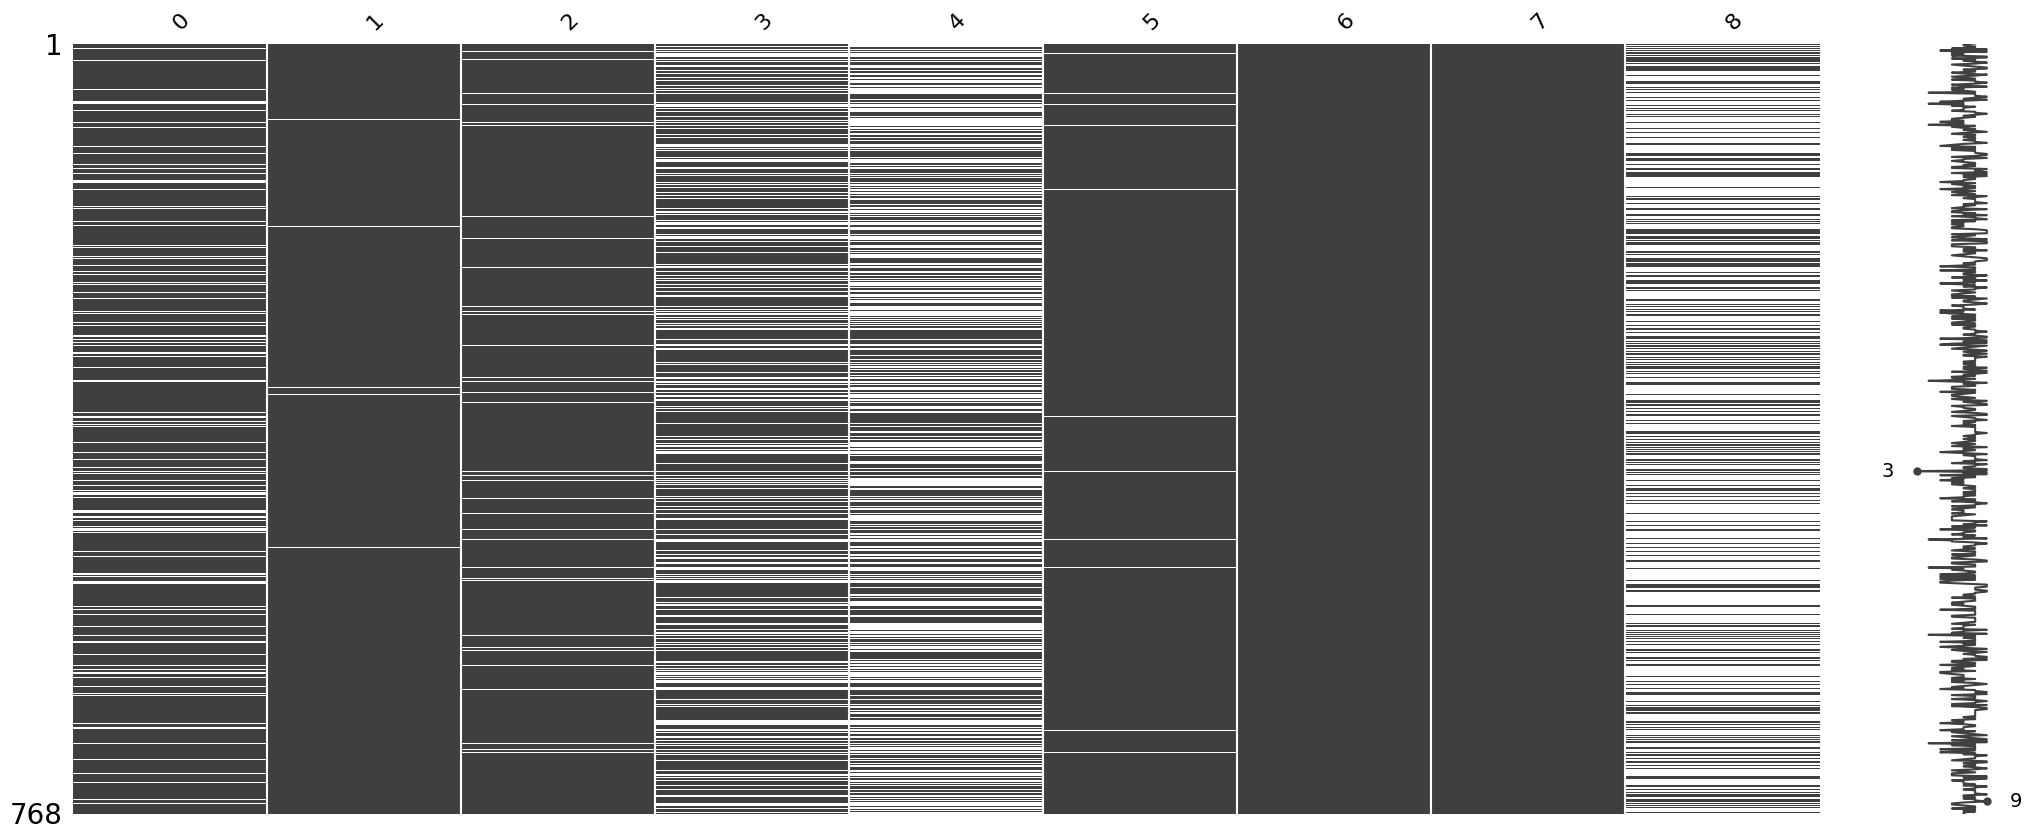

In [51]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [101]:
df_lluvias_archivo = pd.read_csv('./pune_1965_to_2002.csv')
df_lluvias_archivo.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [102]:
df_lluvias_archivo.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
33,1998,0.008,2.671,0.073,0.377,15.717,238.609,590.663,362.357,243.444,96.324,52.965,0.035
34,1999,0.000,1.431,0.000,0.642,35.828,415.471,277.137,98.616,225.962,180.300,0.263,0.033
35,2000,0.000,0.170,0.000,1.193,26.237,371.328,265.417,220.814,147.196,38.246,15.274,8.187
36,2001,0.147,0.000,2.178,1.528,7.860,247.982,279.547,189.404,158.025,135.518,23.633,0.003
37,2002,0.231,0.911,0.388,53.266,18.430,509.145,84.936,257.205,78.269,21.486,0.614,0.000


In [54]:
# guardo en una variable de formato lista, la columna de años
indice = list(df_lluvias_archivo.Year)
indice

[1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002]

In [104]:
# en un df guardo las columnas del indice 1 al final
columnas = df_lluvias_archivo.columns[1:]
columnas

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

In [105]:
# en un df, guardo los valores (array())
valores = df_lluvias_archivo.values[:,1:]
valores

array([[2.90000e-02, 6.90000e-02, 0.00000e+00, 2.16670e+01, 1.78590e+01,
        1.02111e+02, 6.06071e+02, 4.02521e+02, 6.95110e+01, 5.24900e+00,
        1.62320e+01, 2.20750e+01],
       [9.05000e-01, 0.00000e+00, 0.00000e+00, 2.98100e+00, 6.30080e+01,
        9.40880e+01, 4.81942e+02, 5.93860e+01, 1.50624e+02, 1.30800e+00,
        4.12140e+01, 4.13200e+00],
       [2.48000e-01, 3.39000e+00, 1.32000e+00, 1.34820e+01, 1.11160e+01,
        2.51314e+02, 7.80006e+02, 1.81069e+02, 1.83757e+02, 5.04040e+01,
        8.39300e+00, 3.76850e+01],
       [3.18000e-01, 3.03500e+00, 1.70400e+00, 2.33070e+01, 7.44100e+00,
        1.79872e+02, 3.79354e+02, 1.71979e+02, 2.19884e+02, 7.39970e+01,
        2.33260e+01, 2.02000e+00],
       [2.48000e-01, 2.52400e+00, 3.34000e-01, 4.56900e+00, 6.21300e+00,
        3.93682e+02, 6.78354e+02, 3.97335e+02, 2.05413e+02, 2.40140e+01,
        2.43850e+01, 1.95100e+00],
       [7.00000e-02, 0.00000e+00, 1.00000e-03, 1.62180e+01, 6.80360e+01,
        3.00546e+02, 3

In [106]:
# creo un df le paso los parametros valores, el index (años, y columnas)
df_lluvias = pd.DataFrame(valores,index=indice,columns=columnas)
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [60]:
# sumo la cantidad de lluvia por columna,
df_lluvias.sum()

Jan       11.186
Feb       41.843
Mar       63.733
Apr      470.487
May      952.272
Jun    12809.663
Jul    16340.395
Aug    10529.357
Sep     7642.245
Oct     2783.320
Nov      958.492
Dec      230.646
dtype: float64

In [61]:
# saco el promedio de lluvia, y le digo que lo haga poir el eje fila
df_lluvias.mean(axis='rows')

Jan      0.294368
Feb      1.101132
Mar      1.677184
Apr     12.381237
May     25.059789
Jun    337.096395
Jul    430.010395
Aug    277.088342
Sep    201.111711
Oct     73.245263
Nov     25.223474
Dec      6.069632
dtype: float64

In [107]:
df_lluvias.describe().round(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,0.3,1.1,1.7,12.4,25.1,337.1,430.0,277.1,201.1,73.2,25.2,6.1
std,0.6,1.7,2.5,13.7,22.5,171.7,178.0,132.2,123.7,62.9,31.8,11.7
min,0.0,0.0,0.0,0.1,0.5,94.1,84.9,59.4,44.6,1.1,0.3,0.0
25%,0.0,0.0,0.0,2.3,7.0,226.2,322.5,183.2,105.9,22.0,3.7,0.0
50%,0.0,0.2,0.6,5.5,18.1,312.1,415.1,243.2,181.0,49.8,14.7,0.5
75%,0.2,1.9,2.1,19.8,33.1,412.6,555.3,401.2,242.4,115.7,37.0,4.2
max,3.0,8.4,9.6,53.3,80.5,773.7,780.0,541.6,613.5,225.9,122.8,37.7


In [63]:
# traspongo el df
df_lluvias.T.describe().round(1)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
count,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
mean,105.3,75.0,126.8,90.5,144.9,106.1,98.1,59.2,130.8,118.8,...,100.9,165.6,100.8,135.9,153.7,133.6,103.0,91.2,87.2,85.4
std,193.8,136.7,223.5,121.5,226.5,130.8,139.3,100.1,209.3,148.0,...,141.6,272.2,154.0,194.0,243.5,189.4,140.4,128.4,108.0,152.2
min,0.0,0.0,0.2,0.3,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.0,1.2,7.1,2.8,2.4,0.1,0.0,0.1,2.3,0.2,...,1.8,2.0,1.5,2.1,3.8,0.3,0.2,0.9,1.2,0.6
50%,19.8,22.7,25.6,23.3,15.1,42.1,20.1,12.5,10.2,34.0,...,20.7,25.1,25.0,9.3,27.5,34.3,18.6,20.8,15.7,20.0
75%,77.7,70.8,181.7,174.0,252.5,189.8,163.2,81.7,201.6,213.8,...,169.2,145.0,126.5,205.9,154.8,239.8,191.7,165.6,165.9,79.9
max,606.1,481.9,780.0,379.4,678.4,330.5,372.7,338.5,696.0,405.4,...,450.1,749.0,501.5,558.6,673.8,590.7,415.5,371.3,279.5,509.1


In [108]:
df_lluvias_archivo.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [109]:
# Metodo grouby 
# va el df.groupby(la columna por cual agrupo)[las columnas que agrupo].funcion.funcion 
print(df_lluvias_archivo.groupby('Year')['Jan','Feb','Mar'].mean().head(15))

        Jan    Feb    Mar
Year                     
1965  0.029  0.069  0.000
1966  0.905  0.000  0.000
1967  0.248  3.390  1.320
1968  0.318  3.035  1.704
1969  0.248  2.524  0.334
1970  0.070  0.000  0.001
1971  0.000  0.000  0.000
1972  0.000  0.029  0.000
1973  0.000  2.969  0.234
1974  0.000  0.000  6.427
1975  0.333  0.585  0.000
1976  0.000  0.000  5.993
1977  0.000  2.981  3.289
1978  0.061  4.197  4.004
1979  0.000  0.386  3.343


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28756\2526438492.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_lluvias_archivo.groupby('Year')['Jan','Feb','Mar'].mean().head(15))


In [66]:
Presidentes_archivo = pd.read_csv('./us_presidents 2.csv')
Presidentes_archivo.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [110]:
Presidentes_nombres = pd.Series(Presidentes_archivo['president'])
Presidentes_nombres

0          George Washington
1                 John Adams
2           Thomas Jefferson
3              James Madison
4               James Monroe
5          John Quincy Adams
6             Andrew Jackson
7           Martin Van Buren
8     William Henry Harrison
9                 John Tyler
10             James K. Polk
11            Zachary Taylor
12          Millard Fillmore
13           Franklin Pierce
14            James Buchanan
15           Abraham Lincoln
16            Andrew Johnson
17          Ulysses S. Grant
18       Rutherford B. Hayes
19         James A. Garfield
20         Chester A. Arthur
21          Grover Cleveland
22         Benjamin Harrison
23          Grover Cleveland
24          William McKinley
25        Theodore Roosevelt
26       William Howard Taft
27            Woodrow Wilson
28         Warren G. Harding
29           Calvin Coolidge
30            Herbert Hoover
31     Franklin D. Roosevelt
32           Harry S. Truman
33      Dwight D. Eisenhower
34           J

In [111]:
Presidentes_nombres.str.upper()

0          GEORGE WASHINGTON
1                 JOHN ADAMS
2           THOMAS JEFFERSON
3              JAMES MADISON
4               JAMES MONROE
5          JOHN QUINCY ADAMS
6             ANDREW JACKSON
7           MARTIN VAN BUREN
8     WILLIAM HENRY HARRISON
9                 JOHN TYLER
10             JAMES K. POLK
11            ZACHARY TAYLOR
12          MILLARD FILLMORE
13           FRANKLIN PIERCE
14            JAMES BUCHANAN
15           ABRAHAM LINCOLN
16            ANDREW JOHNSON
17          ULYSSES S. GRANT
18       RUTHERFORD B. HAYES
19         JAMES A. GARFIELD
20         CHESTER A. ARTHUR
21          GROVER CLEVELAND
22         BENJAMIN HARRISON
23          GROVER CLEVELAND
24          WILLIAM MCKINLEY
25        THEODORE ROOSEVELT
26       WILLIAM HOWARD TAFT
27            WOODROW WILSON
28         WARREN G. HARDING
29           CALVIN COOLIDGE
30            HERBERT HOOVER
31     FRANKLIN D. ROOSEVELT
32           HARRY S. TRUMAN
33      DWIGHT D. EISENHOWER
34           J

In [112]:
Presidentes_nombres.str.len()

0     17
1     10
2     16
3     13
4     12
5     17
6     14
7     16
8     22
9     10
10    13
11    14
12    16
13    15
14    14
15    15
16    14
17    16
18    19
19    17
20    17
21    16
22    17
23    16
24    16
25    18
26    19
27    14
28    17
29    15
30    14
31    21
32    15
33    20
34    15
35    17
36    13
37    11
38    12
39    13
40    17
41    12
42    14
43    12
44    12
Name: president, dtype: int64

In [113]:
Presidentes_nombres.str.lower()

0          george washington
1                 john adams
2           thomas jefferson
3              james madison
4               james monroe
5          john quincy adams
6             andrew jackson
7           martin van buren
8     william henry harrison
9                 john tyler
10             james k. polk
11            zachary taylor
12          millard fillmore
13           franklin pierce
14            james buchanan
15           abraham lincoln
16            andrew johnson
17          ulysses s. grant
18       rutherford b. hayes
19         james a. garfield
20         chester a. arthur
21          grover cleveland
22         benjamin harrison
23          grover cleveland
24          william mckinley
25        theodore roosevelt
26       william howard taft
27            woodrow wilson
28         warren g. harding
29           calvin coolidge
30            herbert hoover
31     franklin d. roosevelt
32           harry s. truman
33      dwight d. eisenhower
34           j

In [114]:
Presidentes_nombres[Presidentes_nombres.str.startswith(pat='J') ]

1            John Adams
3         James Madison
4          James Monroe
5     John Quincy Adams
9            John Tyler
10        James K. Polk
14       James Buchanan
19    James A. Garfield
34      John F. Kennedy
38         Jimmy Carter
Name: president, dtype: object

In [72]:
import re
# si se pone True, se asume que es una regular expression
Presidentes_nombres[~Presidentes_nombres.str.contains(pat='Bill|Calvin', regex=True)]

0          George Washington
1                 John Adams
2           Thomas Jefferson
3              James Madison
4               James Monroe
5          John Quincy Adams
6             Andrew Jackson
7           Martin Van Buren
8     William Henry Harrison
9                 John Tyler
10             James K. Polk
11            Zachary Taylor
12          Millard Fillmore
13           Franklin Pierce
14            James Buchanan
15           Abraham Lincoln
16            Andrew Johnson
17          Ulysses S. Grant
18       Rutherford B. Hayes
19         James A. Garfield
20         Chester A. Arthur
21          Grover Cleveland
22         Benjamin Harrison
23          Grover Cleveland
24          William McKinley
25        Theodore Roosevelt
26       William Howard Taft
27            Woodrow Wilson
28         Warren G. Harding
30            Herbert Hoover
31     Franklin D. Roosevelt
32           Harry S. Truman
33      Dwight D. Eisenhower
34           John F. Kennedy
35         Lyn

In [73]:
Presidentes_nombres.str.replace(pat='Calvin',repl=' ',)

0          George Washington
1                 John Adams
2           Thomas Jefferson
3              James Madison
4               James Monroe
5          John Quincy Adams
6             Andrew Jackson
7           Martin Van Buren
8     William Henry Harrison
9                 John Tyler
10             James K. Polk
11            Zachary Taylor
12          Millard Fillmore
13           Franklin Pierce
14            James Buchanan
15           Abraham Lincoln
16            Andrew Johnson
17          Ulysses S. Grant
18       Rutherford B. Hayes
19         James A. Garfield
20         Chester A. Arthur
21          Grover Cleveland
22         Benjamin Harrison
23          Grover Cleveland
24          William McKinley
25        Theodore Roosevelt
26       William Howard Taft
27            Woodrow Wilson
28         Warren G. Harding
29                  Coolidge
30            Herbert Hoover
31     Franklin D. Roosevelt
32           Harry S. Truman
33      Dwight D. Eisenhower
34           J

In [115]:
fecha = pd.to_datetime('03/01/2020',dayfirst=True)
fecha

Timestamp('2020-01-03 00:00:00')

In [116]:
fin = pd.to_datetime('10/01/2020',dayfirst=True)
fechas_1 = pd.date_range(start=fecha, end=fin)
fechas_1

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [76]:
fechas_2 = pd.date_range(start=fecha, periods=8)
fechas_2

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [77]:
fechas_3 = pd.date_range(start= fecha, periods= 8, freq='M')
fechas_3

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [78]:
mes_inicio = fecha.strftime('%Y-%m')
mes_inicio

'2020-01'

In [79]:
fechas_4 = pd.period_range(start=mes_inicio, periods=8, freq='M')
fechas_4

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08'],
            dtype='period[M]')

In [80]:
cuanto_tiempo = fechas_3[7] - fechas_3[0]
cuanto_tiempo

Timedelta('213 days 00:00:00')

In [81]:
cuanto_tiempo_meses = fechas_3[7].to_period('M') - fechas_3[0].to_period('M') 
cuanto_tiempo_meses

<7 * MonthEnds>

In [82]:
fechas_presidentes_orig = Presidentes_archivo['start']
fechas_presidentes_orig

0         April 30, 1789
1          March 4, 1797
2          March 4, 1801
3          March 4, 1809
4          March 4, 1817
5          March 4, 1825
6          March 4, 1829
7          March 4, 1837
8          March 4, 1841
9          April 4, 1841
10         March 4, 1845
11         March 4, 1849
12          July 9, 1850
13         March 4, 1853
14         March 4, 1857
15         March 4, 1861
16        April 15, 1865
17         March 4, 1869
18         March 4, 1877
19         March 4, 1881
20    September 19, 1881
21         March 4, 1885
22         March 4, 1889
23         March 4, 1893
24         March 4, 1897
25    September 14, 1901
26         March 4, 1909
27         March 4, 1913
28         March 4, 1921
29        August 2, 1923
30         March 4, 1929
31         March 4, 1933
32        April 12, 1945
33      January 20, 1953
34      January 20, 1961
35     November 22, 1963
36      January 20, 1969
37        August 9, 1974
38      January 20, 1977
39      January 20, 1981


In [83]:
type(fechas_presidentes_orig)

pandas.core.series.Series

In [84]:
fechas_presidentes = pd.DatetimeIndex(fechas_presidentes_orig)
fechas_presidentes

DatetimeIndex(['1789-04-30', '1797-03-04', '1801-03-04', '1809-03-04',
               '1817-03-04', '1825-03-04', '1829-03-04', '1837-03-04',
               '1841-03-04', '1841-04-04', '1845-03-04', '1849-03-04',
               '1850-07-09', '1853-03-04', '1857-03-04', '1861-03-04',
               '1865-04-15', '1869-03-04', '1877-03-04', '1881-03-04',
               '1881-09-19', '1885-03-04', '1889-03-04', '1893-03-04',
               '1897-03-04', '1901-09-14', '1909-03-04', '1913-03-04',
               '1921-03-04', '1923-08-02', '1929-03-04', '1933-03-04',
               '1945-04-12', '1953-01-20', '1961-01-20', '1963-11-22',
               '1969-01-20', '1974-08-09', '1977-01-20', '1981-01-20',
               '1989-01-20', '1993-01-20', '2001-01-20', '2009-01-20',
               '2017-01-20'],
              dtype='datetime64[ns]', name='start', freq=None)

In [85]:
Serie_presidentes = pd.Series(Presidentes_nombres.values,index=fechas_presidentes)
Serie_presidentes

start
1789-04-30         George Washington
1797-03-04                John Adams
1801-03-04          Thomas Jefferson
1809-03-04             James Madison
1817-03-04              James Monroe
1825-03-04         John Quincy Adams
1829-03-04            Andrew Jackson
1837-03-04          Martin Van Buren
1841-03-04    William Henry Harrison
1841-04-04                John Tyler
1845-03-04             James K. Polk
1849-03-04            Zachary Taylor
1850-07-09          Millard Fillmore
1853-03-04           Franklin Pierce
1857-03-04            James Buchanan
1861-03-04           Abraham Lincoln
1865-04-15            Andrew Johnson
1869-03-04          Ulysses S. Grant
1877-03-04       Rutherford B. Hayes
1881-03-04         James A. Garfield
1881-09-19         Chester A. Arthur
1885-03-04          Grover Cleveland
1889-03-04         Benjamin Harrison
1893-03-04          Grover Cleveland
1897-03-04          William McKinley
1901-09-14        Theodore Roosevelt
1909-03-04       William Howard 

In [87]:
df= pd.read_csv('./BTCUSD_1hr.csv',sep=',')
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811


In [88]:
df.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,3.946500e+04,39465.000000,39465.000000,39465.000000,39465.000000,39465.000000
mean,6.182322e+11,4817.778638,4844.889457,4788.678433,4817.963371,158.393961
std,7.614885e+11,3925.257801,3954.058698,3893.325248,3925.202322,300.774291
min,1.444309e+09,0.000000,243.600000,0.000000,243.600000,0.000000
25%,1.479827e+09,741.740000,743.000000,740.020000,741.800000,18.164575
50%,1.515344e+09,4142.120000,4165.380000,4118.390000,4142.590000,62.790643
75%,1.550862e+12,7908.480000,7950.000000,7860.750000,7908.480000,175.504078
max,1.586390e+12,19869.860000,19999.000000,19778.120000,19869.860000,8526.751048


In [89]:
# Forma 1
import datetime as dt
df['Mes']= df.Date.dt.month
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Mes
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915,4
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293,4
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108,4
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553,4
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811,4


In [90]:
df.groupby('Mes')[['Open','High','Low','Close','Volume']].mean()

,Open,High,Low,Close,Volume
Mes,,,,,
1,5235.455250,5272.549905,5195.977861,5234.947318,139.061508
2,4832.780455,4861.648758,4801.810748,4832.796068,142.184108
3,4285.908084,4313.611925,4255.097919,4284.482791,162.838174
4,3892.424159,3910.033452,3875.407674,3893.959222,134.795994
5,4505.732006,4529.266975,4480.895655,4506.576075,180.035423
6,4850.064049,4875.857771,4819.498139,4850.560615,175.733343
7,5231.004049,5260.415482,5199.455973,5231.356697,210.209390
8,5429.627658,5453.530548,5403.822108,5429.836529,171.747448
9,5270.428455,5290.118993,5247.742782,5269.698097,159.681779


In [92]:
# Segunda forma
df= pd.read_csv('./BTCUSD_1hr.csv',sep=',')
#df['Date']=pd.to_datetime(df['Date']) # No lo podemos convertir a fecha
df['Mes']= [x[5:7] for x in df.Date]
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Mes
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915,04
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293,04
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108,04
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553,04
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811,04


In [93]:
df.groupby('Mes')[['Open','High','Low','Close','Volume']].mean()

,Open,High,Low,Close,Volume
Mes,,,,,
01,5235.455250,5272.549905,5195.977861,5234.947318,139.061508
02,4832.780455,4861.648758,4801.810748,4832.796068,142.184108
03,4285.908084,4313.611925,4255.097919,4284.482791,162.838174
04,3892.424159,3910.033452,3875.407674,3893.959222,134.795994
05,4505.732006,4529.266975,4480.895655,4506.576075,180.035423
06,4850.064049,4875.857771,4819.498139,4850.560615,175.733343
07,5231.004049,5260.415482,5199.455973,5231.356697,210.209390
08,5429.627658,5453.530548,5403.822108,5429.836529,171.747448
09,5270.428455,5290.118993,5247.742782,5269.698097,159.681779


Text(0, 0.5, 'Valor')

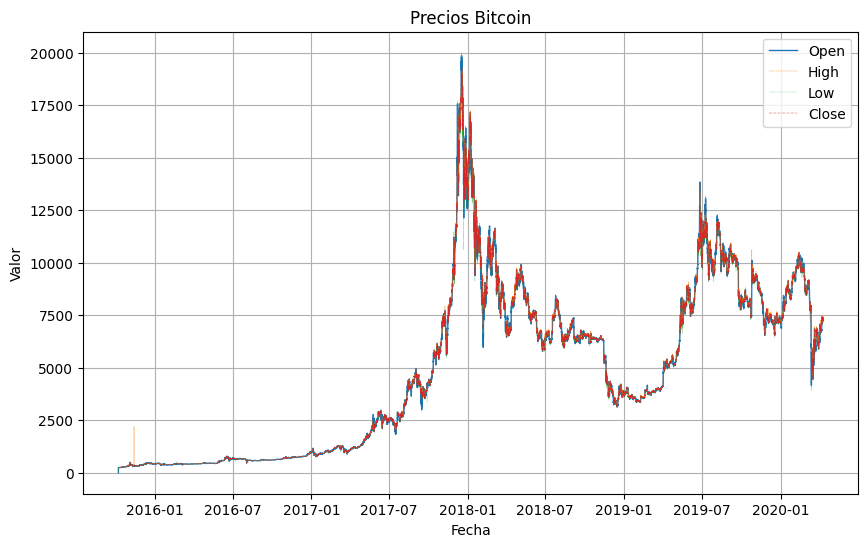

In [94]:
df= pd.read_csv('./BTCUSD_1hr.csv',sep=',')
df['Date']=pd.to_datetime(df['Date'])
df.head()
import matplotlib.pyplot as plt
fig,ax= plt.subplots(figsize=(10,6))
ax.plot(df.Date, df.Open, label='Open',linewidth=1)
ax.plot(df.Date, df.High, label='High',linewidth=0.3,linestyle='--')
ax.plot(df.Date, df.Low, label='Low',linewidth=0.3,linestyle=':')
ax.plot(df.Date, df.Close, label='Close',linewidth=0.3,linestyle='dashdot')

ax.legend()
ax.grid()
ax.set_title('Precios Bitcoin')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

Uso de algoritmos para rellenar nulos (NO USAR ESTO)